In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Bangaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Handling missing values

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

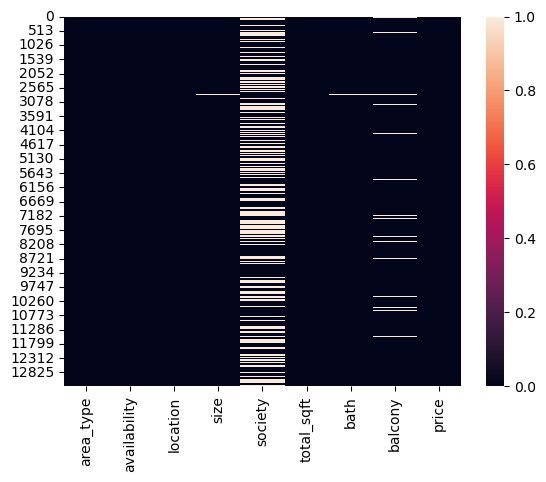

In [6]:
sns.heatmap(data.isnull())

Missing values in socity are quite random. So, we are going to drop that column

In [7]:
# Drop all the less significant columns
data.drop(['availability','society','area_type','balcony'],axis=1,inplace=True)

In [8]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<Axes: >

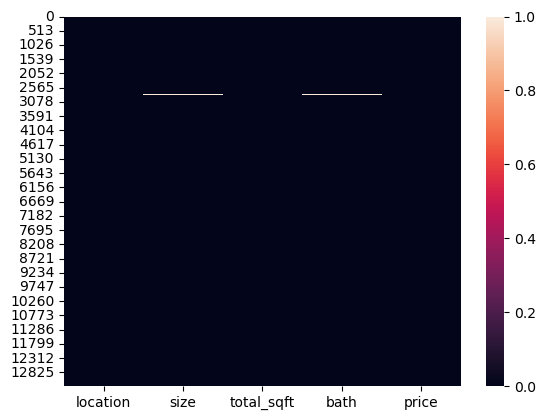

In [9]:
sns.heatmap(data.isnull())

In [10]:
# drop other null values
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature engineering

# Size 

In [11]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Two type of category(BHK and Bedroom) present in size column, we have to generalized it.

In [12]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
data.drop(['size'],axis=1,inplace=True)

In [14]:
data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


# Total_sqft

In [15]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#This function return true if x can be converted into float other wise return false
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
#The float values in total_sqft column
data_float = data[data['total_sqft'].apply(is_float)].head(10)
data_float['total_sqft']

0    1056
1    2600
2    1440
3    1521
4    1200
5    1170
6    2732
7    3300
8    1310
9    1020
Name: total_sqft, dtype: object

In [18]:
#The values which are can'nt be converted into float in total_sqft column
data_not_float = data[~data['total_sqft'].apply(is_float)].head(15)
data_not_float['total_sqft']

30        2100 - 2850
122       3067 - 8156
137       1042 - 1105
165       1145 - 1340
188       1015 - 1540
410    34.46Sq. Meter
549       1195 - 1440
648         4125Perch
661       1120 - 1145
672       3090 - 5002
772       1160 - 1195
775     1000Sq. Meter
850       1115 - 1130
872     1100Sq. Yards
886         520 - 645
Name: total_sqft, dtype: object

In [19]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2  # for the values which are in range
    try:
        return float(x)
    except:
        return None  

data of other unit(sq.meter,Perch,Yards,Acres) other than sqft are neglected.

In [20]:
data1 = data.copy()
data1.total_sqft = data1.total_sqft.apply(convert)
data1 = data1[data1.total_sqft.notnull()]
data1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [21]:
data1.total_sqft

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13200, dtype: float64

type of 'total_sqft' is float now

# Price per sqft

For price prediction of a property Price per sqft will be an important parameter

In [22]:
data2=data1.copy()
data2['price_per_sqft'] = (data2['price']/data2['total_sqft'])*100000
data2['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13200, dtype: float64

In [23]:
data2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


# dimensionality reduction

In [24]:
data2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
#Total number of unique value
len(data2['location'].unique())

1298

In [26]:
#Count of each unique value
location_count = data2['location'].value_counts(ascending=False)
location_count

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

Location is a categorical variable. There are 1298 number of unique values in locality. This is problematic for categorical to numerical conversion in future case. Here, we should reduce the dimensionality (reduce the number of location). 

In [27]:
location_less = location_count[location_count<=10]
len(location_less)

1058

In [28]:
# Locality which has count<=10 are labeled as 'other'
data2['location'] = data2['location'].apply(lambda x:'other' if x in location_less else x )
len(data2['location'].unique())
#unique value has been reduced, all count<10 is labeled as other

241

In [29]:
data2.head(20)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


# Outlier removal using business logic

As a data scientist when one have a conversation with the business manager, he will tell that normally, square ft per bedroom is 300. Then square ft per bedroom- 200 will be weird and this will be considered as outlier. We will remove outliers by keeping our minimum thresold(sqft) per bhk to be 300 sqft


# total_sqft/bhk

In [30]:
#data for sqft per bhk<300
data2[(data2.total_sqft/data2.bhk)<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [30]:
##data for sqft per bhk not less than 300
data3 = data2[~(data2.total_sqft/data2.bhk<300)]

In [31]:
data3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [32]:
data2.shape

(13200, 6)

In [33]:
data3.shape

(12456, 6)

see,outliers have been removed for total_sqft/bhk.

In [34]:
data3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


# Price per sqft (location and bhk wise)

Previously we have seen that, lots of outlier present in price data. Now,we are going to handle this. Price depends on bhk and location. So, we will determine the variable price per sqft per location for more generalized form.

In [35]:
data4 = data3.copy()

In [36]:
def remove_pps_outliers(df):
    
    #create empty dataframe to store non outliers
    df_out = pd.DataFrame()
    
    #'name' represents the unique 'location' value, and 'group' is the corresponding data for that 'location'.
    for name,group in df.groupby('location'):
        m = np.mean(group.price_per_sqft)
        st = np.std(group.price_per_sqft)
        
#Only consider the data points between the range (mean-std) to (mean + std) rest are outliers
        reduced_df = group[(group.price_per_sqft>(m-st)) & (group.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data5 = remove_pps_outliers(data4)

In [37]:
data4.shape

(12456, 6)

In [38]:
data5.shape

(10245, 6)

around 2000 outliers have been removed

In [39]:
#Plot of the price vs total sqft 

import matplotlib

def plot_scatter_chart(df,location):
    bhk2 = data5[(data5.location==location) & (data5.bhk==2)]
    bhk3 = data5[(data5.location==location) & (data5.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50) 
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
#plot_scatter_chart(data5,"Rajaji Nagar")

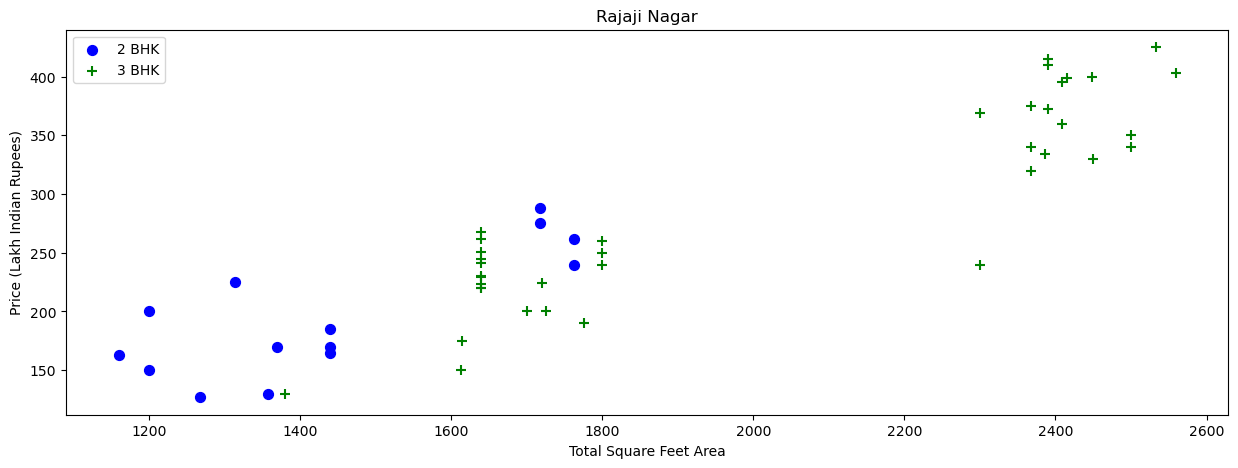

In [40]:
plot_scatter_chart(data5,"Rajaji Nagar")

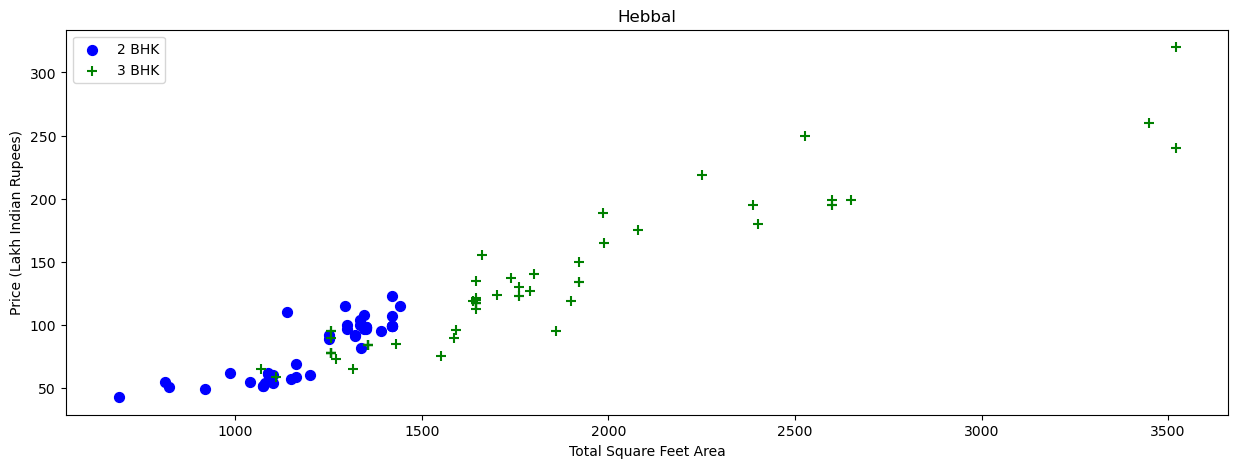

In [41]:
plot_scatter_chart(data5,'Hebbal')

In [42]:
def remove_bhk_outliers(df):
    
   #create blank array to store outliers 
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        
        #create blank dictionary to store statistical description like mean,std,count of each bhk
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)  #obtain statistics for the previous 'bhk-1
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data6 = remove_bhk_outliers(data5)

In [43]:
data5.shape

(10245, 6)

In [44]:
data6.shape

(7331, 6)

arround 300 data points are excluded as outliers

In [45]:
#Plot of the price vs total sqft after outlier detection 

import matplotlib

def plot_scatter_chart(df,location):
    bhk2 = data6[(data6.location==location) & (data5.bhk==2)]
    bhk3 = data6[(data6.location==location) & (data5.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50) 
    # Limit the number of x-axis ticks (e.g., every 10th tick)
    x_ticks = range(0, len(bhk2.total_sqft), 10)  
    x_ticks = range(0, len(bhk3.total_sqft), 10)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

C:\Users\AmitR\AppData\Local\Temp\ipykernel_26188\438898897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = data6[(data6.location==location) & (data5.bhk==2)]
C:\Users\AmitR\AppData\Local\Temp\ipykernel_26188\438898897.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = data6[(data6.location==location) & (data5.bhk==3)]


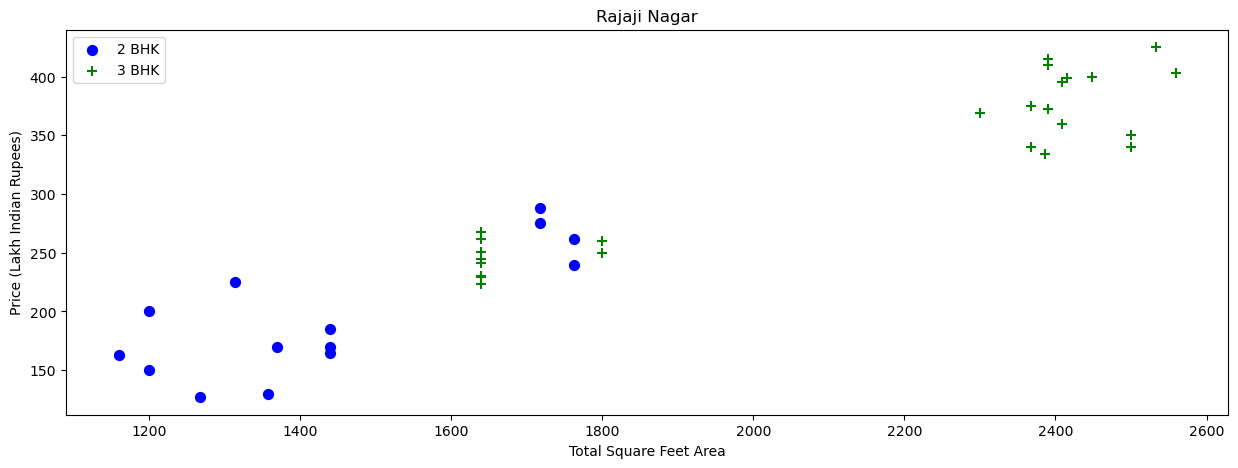

In [46]:
plot_scatter_chart(data6,"Rajaji Nagar")

C:\Users\AmitR\AppData\Local\Temp\ipykernel_26188\438898897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = data6[(data6.location==location) & (data5.bhk==2)]
C:\Users\AmitR\AppData\Local\Temp\ipykernel_26188\438898897.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = data6[(data6.location==location) & (data5.bhk==3)]


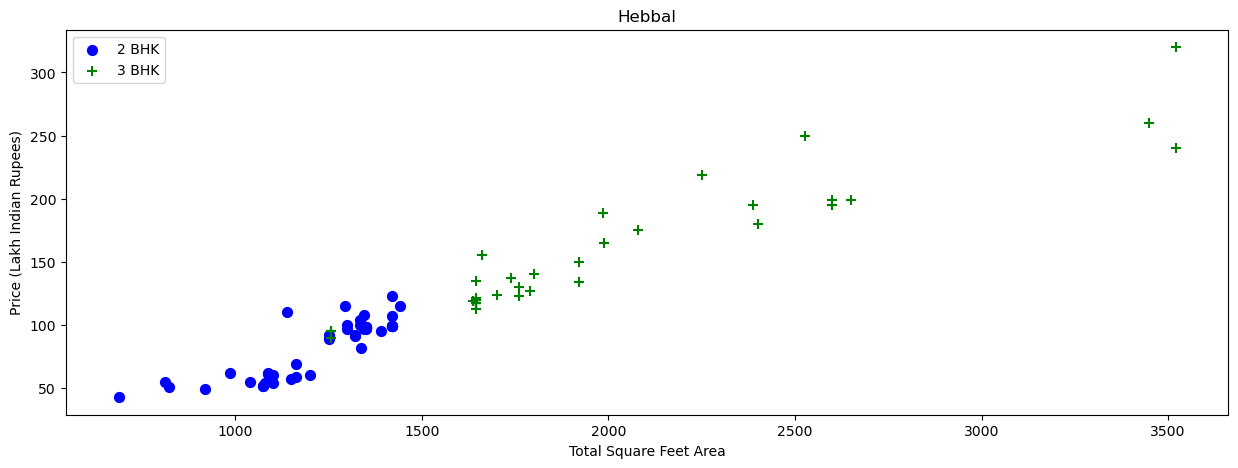

In [47]:
plot_scatter_chart(data6,'Hebbal')

Text(0, 0.5, 'Count')

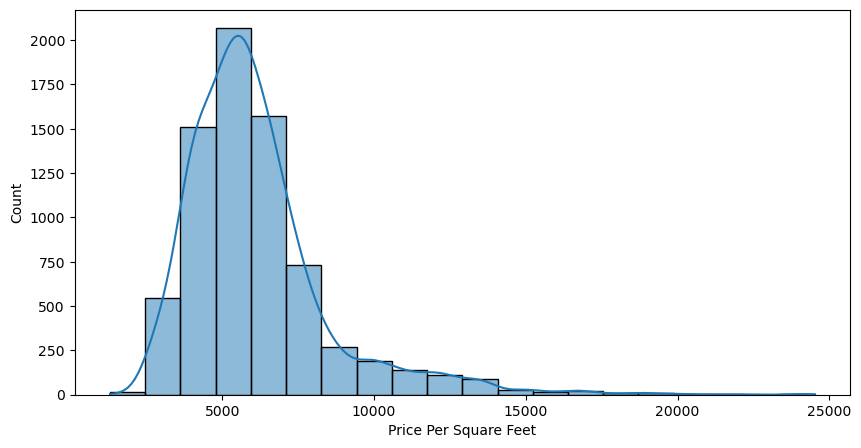

In [48]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
sns.histplot(data6.price_per_sqft,bins=20,kde=True)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Maximun properties are of 5000 sqft. Price per sqft gives skewed normal distribution.

# Bathroom feature

Text(0, 0.5, 'Count')

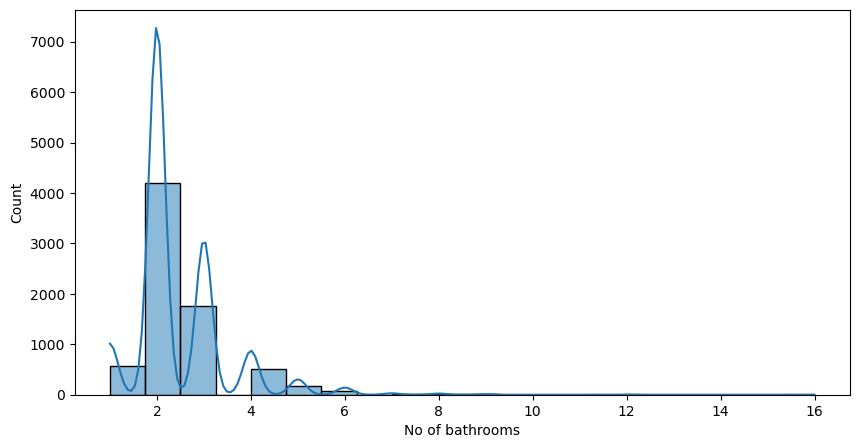

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
sns.histplot(data6.bath,bins=20,kde=True)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

Maximum of houses have more than two bathrooms.

In [50]:
data6[(data6.bath==4)&(data6.bhk==2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
9707,other,1200.0,4.0,138.0,2,11500.000000
10038,other,600.0,4.0,70.0,2,11666.666667


For a 2 bhk flat 4 bathroom may be weird. So, here we consider this kind of data as outlier.

In [51]:
#outlier
data6[data6.bath>data6.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8402,other,11338.0,9.0,1000.0,6,8819.897689


In [52]:
#Non_outlier
data7 = data6[data6.bath<data6.bhk+2]
data7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [53]:
data7.shape

(7253, 6)

In [54]:
data6.shape

(7331, 6)

In [56]:
data8 = data7.drop(['price_per_sqft'],axis=1)


In [57]:
data8.shape

(7253, 5)

In [58]:
data8.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


# Only categorical variable in dataset is the locality. We will convert that into numerical one using one hot encoding.

In [59]:
dummies = pd.get_dummies(data8.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
data9 = pd.concat([data8,dummies.drop('other',axis='columns')],axis='columns')
#as per the rule of One Hot Encoding we can drop one column 
data9.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data10 = data9.drop('location',axis='columns')
data10.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data9.shape

(7253, 245)

In [65]:
data10.shape

(7253, 244)

# Model building

# Split the dataset

In [86]:
x = data10.drop('price',axis=1)
y=data10['price']

In [87]:
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [79]:
y.shape

(7253,)

In [89]:
x.shape

(7253, 243)

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Model selection

For this kind of dataset linear regression,lasso regression, desicion tree, Random forest algorithm may be suitable. Best suitable model can fe found by GridSearchCV model.

In [91]:
#importing the requiered model
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [112]:
# Filter out FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    #blank list to store the best suitable model and corresding score and parameter 
    scores = []
    
    #Use ShuffleSplit for better result
    from sklearn.model_selection import ShuffleSplit
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [113]:
find_best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,0.848456,{'normalize': False}
1,lasso,0.709027,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.756539,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [114]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

# Conclusion: Performance of Linear Regression algorithm is best in this case

# House price prediction based on some features

In [104]:
#Total Feature available in dataset
len(x.columns)

243

In [105]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [124]:
# Price prediction depending on location,total_sqft,bath,bhk

#Define a function for price prediction
def predict_price(location,total_sqft,bath,bhk):   
    
    loc_index = np.where(x.columns==location)[0][0]

    a = np.zeros(len(x.columns))
    a[0] = total_sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1

    return lr_model.predict([a])

In [125]:
predict_price('Rajaji Nagar',3300, 4, 4)

C:\Users\AmitR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([415.728776])

In [126]:
predict_price('Hebbal',1760, 3, 2)

C:\Users\AmitR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([133.17484272])

# Model is ready for deployment